<a href="https://colab.research.google.com/github/jmarcano101/data110/blob/main/W4_HW_Scraping_Box_Office_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url="https://www.boxofficemojo.com/weekend/2024W07/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'class': 'mojo-body-table'})

data = []

if table:
    rows = table.find_all('tr')[1:]  # Assuming the first row is the header

    for row in rows:
        cells = row.find_all('td')
        if len(cells) >= 9:  # Ensure there are enough cells
            entry = {
                'rank': cells[0].text.strip(),
                'release': cells[1].text.strip(),
                'Title': cells[2].text.strip(),
                'lw': cells[3].text.strip(),
                'percentage': cells[4].text.strip(),
                'change': cells[5].text.strip(),
                'average': cells[6].text.strip(),
                'gross': cells[7].text.strip(),
                'Total Gross': cells[8].text.strip(),
                 'distributor': cells[9].text.strip() if len(cells) > 9 else ''
            }
            data.append(entry)


        csv_file = "box_office_data.csv"
        with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
            writer = csv.DictWriter(file, fieldnames=data[0].keys())
            writer.writeheader()
            for item in data:
                writer.writerow(item)
        print(f"Data saved to {csv_file}")
    else:
        print("No data extracted from the table.")
else:
    print("Table not found in the page.")


In [33]:
df=pd.read_csv('/content/box_office_data.csv')
df.head(6)

,rank,release,Title,lw,percentage,change,average,gross,Total Gross,distributor
0,1,-,Bob Marley: One Love,"$28,659,004",-,"3,539",-,"$8,098","$46,530,209",1
1,2,-,Madame Web,"$15,335,860",-,"4,013",-,"$3,821","$23,540,479",1
2,3,1,Argylle,"$4,887,335",-21.8%,"3,647",+42,"$1,340","$36,635,815",3
3,4,5,Migration,"$3,822,145",+30.2%,"2,455",-229,"$1,556","$114,900,140",9
4,5,-,The Chosen: S4 Episodes 4-6,"$3,605,972",-,"2,272",-,"$1,587","$4,387,345",1
5,6,4,Wonka,"$3,514,580",+15%,"2,347",-417,"$1,497","$209,935,877",10


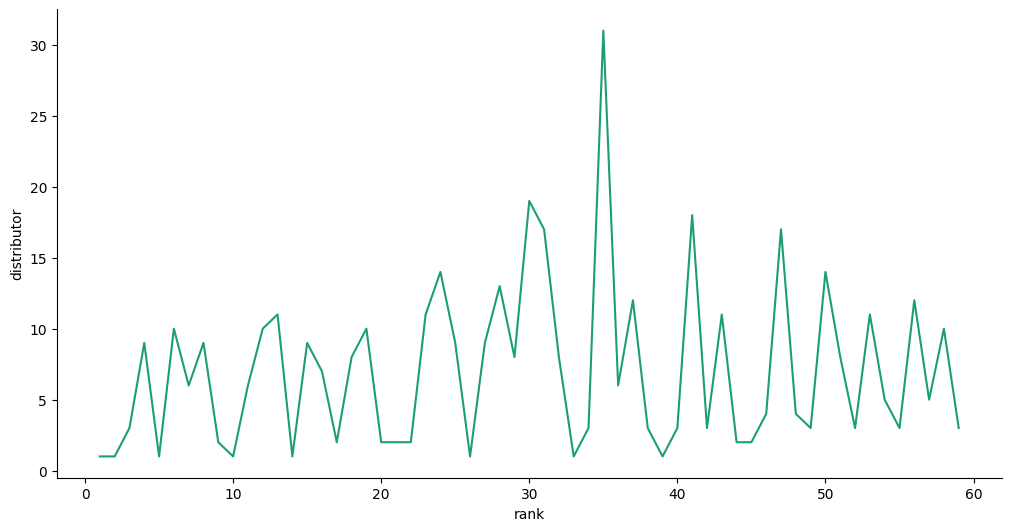

In [15]:
# @title rank vs distributor

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['rank']
  ys = series['distributor']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('rank', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('rank')
_ = plt.ylabel('distributor')

In [13]:
data = df.head(6)

In [22]:

# This line is correct as per your DataFrame structure
data['Total Gross Cleaned'] = data['Total Gross'].str.replace('[$,]', '', regex=True).astype(float)
data_sorted = data.sort_values(by="Total Gross Cleaned", ascending = True)
print(data)


   rank release                        Title           lw percentage change  \
0     1       -         Bob Marley: One Love  $28,659,004          -  3,539   
1     2       -                   Madame Web  $15,335,860          -  4,013   
2     3       1                      Argylle   $4,887,335     -21.8%  3,647   
3     4       5                    Migration   $3,822,145     +30.2%  2,455   
4     5       -  The Chosen: S4 Episodes 4-6   $3,605,972          -  2,272   
5     6       4                        Wonka   $3,514,580       +15%  2,347   

  average   gross   Total Gross  distributor  Total Gross Cleaned  
0       -  $8,098   $46,530,209            1           46530209.0  
1       -  $3,821   $23,540,479            1           23540479.0  
2     +42  $1,340   $36,635,815            3           36635815.0  
3    -229  $1,556  $114,900,140            9          114900140.0  
4       -  $1,587    $4,387,345            1            4387345.0  
5    -417  $1,497  $209,935,877       

<ipython-input-22-5543b545c028>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Gross Cleaned'] = data['Total Gross'].str.replace('[$,]', '', regex=True).astype(float)


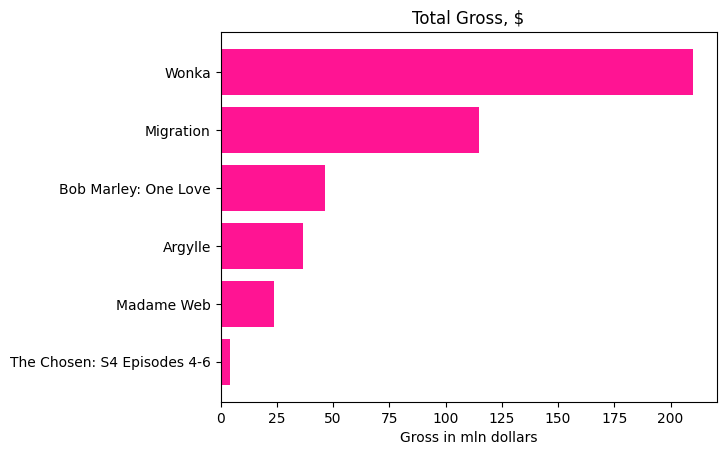

AttributeError: 'list' object has no attribute 'sort_values'

In [42]:
# Task 1 code need to be here
plt.barh(data_sorted["Title"], data_sorted["Total Gross Cleaned"]/1000000, color="deeppink")
plt.xlabel("Gross in mln dollars")
plt.title("Total Gross, $")
plt.show()

sorted_data = data.sort_values(by='Total Gross Cleaned', ascending=True)

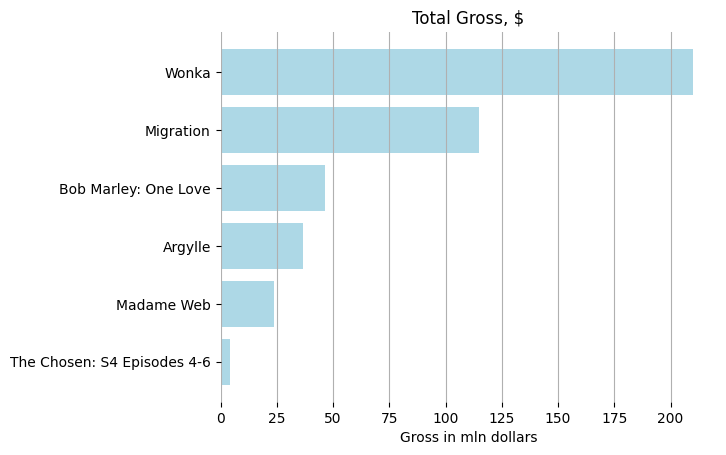

In [43]:

plt.barh(data_sorted["Title"], data_sorted["Total Gross Cleaned"]/1000000, color="lightblue")
plt.xlabel("Gross in mln dollars")
plt.title("Total Gross, $")
plt.grid(axis = 'x')
for pos in ['right', 'top', 'bottom', 'left']:
  plt.gca().spines[pos].set_visible(False)

plt.show()